# API Testing

FastAPI + Cloudinary implementation

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 28/01/2026   | Martin | Created   | Notebook to test FastAPI and Cloudinary API | 

# Content

* [Cloudinary](#cloudinary)
* [FastAPI](#fastapi)

# Cloudinary

- `Cloudinary`: Image hosting service

In [25]:
import cloudinary
from cloudinary import CloudinaryImage
import cloudinary.uploader
import cloudinary.api
import json
import numpy as np
import secrets
import requests
import matplotlib.pyplot as plt

from dotenv import dotenv_values

env = dotenv_values(".env")
config = cloudinary.config(
  cloud_name=env["CLOUDINARY_CLOUD"],
  api_key=env["CLOUDINARY_API_KEY"],
  api_secret=env["CLOUDINARY_SECRET_KEY"],
  secure=True
)

Upload image

In [10]:
import cv2
def load_image(img_path: str, encoding: str="BGR"):
  try:
    img = cv2.imread(img_path)
    if encoding == "RGB":
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
  except FileNotFoundError:
    print("Could not find the file to load")

In [15]:
def upload_image(img: np.array, filename: str, type: str):
  token = secrets.token_hex(8)
  name = f"{filename}_{token}_{type}"

  # Encode image into memory buffer
  success, buffer = cv2.imencode('.png', img)
  if not success:
    print("Could not encode image")
    return None
  
  image_bytes = buffer.tobytes()

  # Upload to Cloudinary
  response = cloudinary.uploader.upload(
    image_bytes,
    public_id=name,
    overwrite=True,
    resource_type="image"
  )
  src_url = CloudinaryImage(name).build_url()

  return response, src_url

In [16]:
img = load_image("./data/ai_1.png")
response, url = upload_image(img, "test", "ORIG")

In [ ]:
def load_image(url: str):
  response = requests.get(url)
  
  if response.status_code == 200:
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    return image
  else:
    print(f"Failed to retrieve iamge. Status code: {response.status_code}")
    return None

In [28]:
loaded_img = load_image(url)

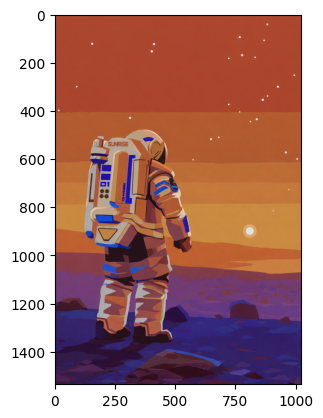

In [29]:
plt.imshow(loaded_img)

# FastAPI

- `FastAPI`: API server

In [30]:
import requests

In [33]:
api_url = "http://localhost:1000/process-default"

payload = {
  "image_url": "https://res.cloudinary.com/dujvkuuor/image/upload/v1769575391/test_26daaa50e6c08d38_ORIG.png",
  "filename": "astonaut",
  "k_colours": 8
}

In [37]:
try:
  response = requests.post(api_url, json=payload, timeout=20)
  result = response.json()

  if response.status_code == 200 and result.get("status") == "success":
    print(f"Message: {result['message']}")
    print(f"Data: {json.dumps(result.get('data'), indent=2)}")
  else:
    print(f"Error Message: {result.get('message', 'No message.')}")

except requests.exceptions.ConnectionError:
  print("Could not connect to API")
except Exception as e:
  print(f"Error: {str(e)}")

Message: Successfully processed image! 🥳
Data: {
  "new_img_url": "https://res.cloudinary.com/dujvkuuor/image/upload/astonaut_27493c646a8c5844_NEW",
  "pbn_url": "https://res.cloudinary.com/dujvkuuor/image/upload/astonaut_ee88cde4e4bfea0a_PBN",
  "colour_names": {
    "1": "Cosmic",
    "2": "Copper",
    "3": "Jacarta",
    "4": "Brandy Punch",
    "5": "Medium Carmine",
    "6": "Mountbatten Pink",
    "7": "Revolver",
    "8": "Spicy Mix"
  },
  "rgb_values": {
    "1": [
      112,
      63,
      110
    ],
    "2": [
      180,
      96,
      52
    ],
    "3": [
      51,
      36,
      109
    ],
    "4": [
      199,
      131,
      63
    ],
    "5": [
      170,
      71,
      46
    ],
    "6": [
      144,
      120,
      128
    ],
    "7": [
      55,
      25,
      54
    ],
    "8": [
      130,
      70,
      74
    ]
  }
}


In [ ]:
%load_ext watermark
%watermark